In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [8]:
# gstreamer_pipeline returns a GStreamer pipeline for capturing from the CSI camera
# Defaults to 1280x720 @ 60fps
# Flip the image by setting the flip_method (most common values: 0 and 2)
# display_width and display_height determine the size of the window on the screen


def gstreamer_pipeline(
    capture_width=1280,
    capture_height=720,
    display_width=1280,
    display_height=720,
    framerate=60,
    flip_method=0,
):
    return (
        "nvarguscamerasrc sensor_id=0 ! "
        "video/x-raw(memory:NVMM), "
        "width=(int)%d, height=(int)%d, "
        "format=(string)NV12, framerate=(fraction)%d/1 ! "
        "nvvidconv flip-method=%d ! "
        "video/x-raw, width=(int)%d, height=(int)%d, format=(string)BGRx ! "
        "videoconvert ! "
        "video/x-raw, format=(string)BGR ! appsink"
        % (
            capture_width,
            capture_height,
            framerate,
            flip_method,
            display_width,
            display_height,
        )
    )


def gstreamer_pipeline1():
    return"nvarguscamerasrc sensor_id=0 !    'video/x-raw(memory:NVMM),width=3264, height=2464, framerate=21/1, format=NV12' !    nvvidconv flip-method=0 ! 'video/x-raw, width=816, height=616' !    nvvidconv ! nvegltransform ! nveglglessink -e"


255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
254.57814633969906
250.58420826099538
244.12621961805556
230.51935438368056
212.52756872106482
193.39207356770834
174.92712782118056
160.32750072337964
148.89835611979166
139.97365776909723
134.27597258391205
130.98672489872686
129.10886212384258
127.92933738425926
127.43908817997685
127.00482892071759
127.12279477719908
127.25377748842592
126.69204752604166
126.81399848090278
126.86417570891204
127.06523509837963
127.11940321180556
127.16604094328704
127.34894169560185
127.38949110243055
127.5067625144676
127.606826171875
127.65083116319444
127.76793981481481
127.83791124131945
127.88932942708334
127.92517505787038
128.06964626736112
128.05452690972223
128.0869972511574
128.2236498119213
128.25769133391205
128.30457103587963
128.36758897569445
128.4091822193287
128.45162905092593
128.50592267071758
128.55531864872685
128.59566804108798
128.6437257667824
128.6946166087963
128.72597330729167
128.84462818287037
128.88182327835648
128.930748

numpy.ndarray

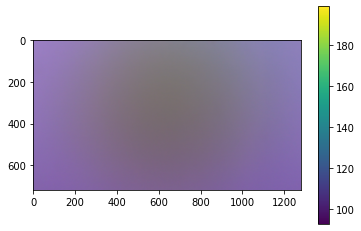

In [23]:
mycam_cmd = gstreamer_pipeline(framerate=21)
cap = cv2.VideoCapture(mycam_cmd) 
for i in range(100):
    state,img = cap.read()
    #
    print(np.mean(img))
plt.figure(i), plt.imshow(img),plt.colorbar(), plt.show
print(img.shape)
cap.release()
type(img)

nvarguscamerasrc sensor_id=0 ! video/x-raw(memory:NVMM), width=(int)1280, height=(int)720, format=(string)NV12, framerate=(fraction)60/1 ! nvvidconv flip-method=0 ! video/x-raw, width=(int)1280, height=(int)720, format=(string)BGRx ! videoconvert ! video/x-raw, format=(string)BGR ! appsink


TypeError: Image data of dtype object cannot be converted to float

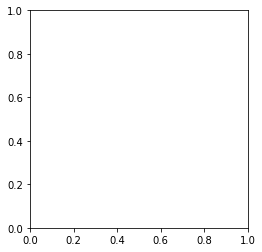

In [4]:
# To flip the image, modify the flip_method parameter (0 and 2 are the most common)
print(gstreamer_pipeline())
cap = cv2.VideoCapture(gstreamer_pipeline(), cv2.CAP_GSTREAMER)
cap.open(0)
#if cap.isOpened():
ret_val, img = cap.read()
plt.figure(1)
plt.imshow(img)
plt.show()
cap.release()


In [5]:
type(img)

NoneType